In [ ]:
#### source: https://github.com/curiousily/Deep-Learning-For-Hackers

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

In [ ]:
csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"
# # csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/AAPL.csv"

In [ ]:
df = pd.read_csv(csv_path, parse_dates=['Date'])

In [ ]:
df = df.sort_values('Date')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [ ]:
df.shape

(3201, 7)

Text(0, 0.5, 'Close Price (USD)')

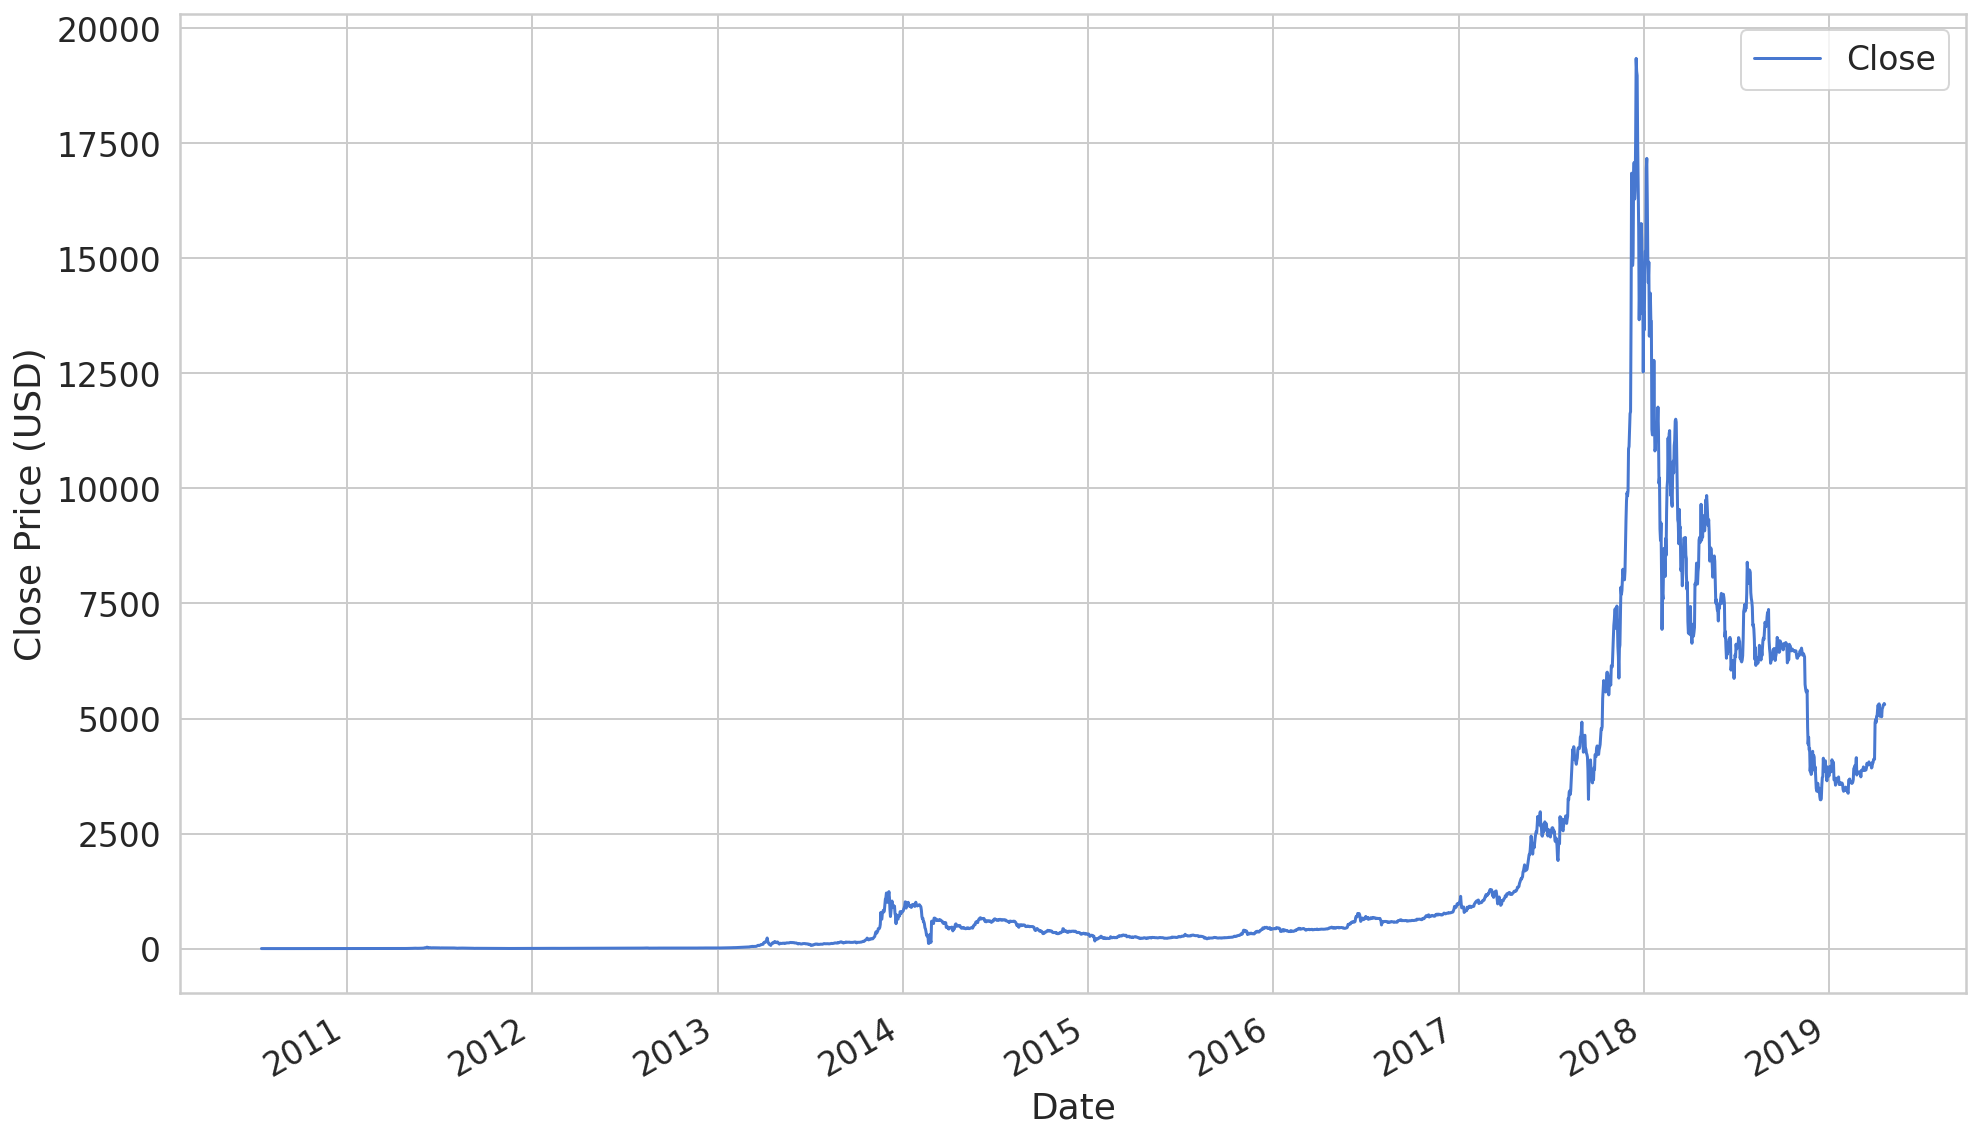

In [ ]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

### Normalize the data in to range 0 to 1
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

close_price = df["Close"].values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [ ]:
scaled_close.shape

(3201, 1)

In [ ]:
#df["scaled_close"] = scaled_close

### Preprocessing

In [ ]:
train_size = int(len(scaled_close) * 0.8)
test_size = len(scaled_close) - train_size
train, test = scaled_close[0:train_size], scaled_close[train_size:len(df)]
print(len(train), len(test))

2560 641


In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)        
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train, time_steps)
X_test, y_test = create_dataset(test, test, time_steps)

print(X_train.shape, y_train.shape)

(2550, 10, 1) (2550, 1)


## Long short-term memory
![](https://miro.medium.com/max/3000/1*IMalbwl6uj3nlqxixZYFvA.jpeg)
https://en.wikipedia.org/wiki/Long_short-term_memory <br>
https://colah.github.io/posts/2015-08-Understanding-LSTMs/

More tutorials: https://medium.com/@francesca_lim/twitter-u-s-airline-sentiment-analysis-using-keras-and-rnns-1956f42294ef <br>
Math behind RNN: https://www.youtube.com/watch?v=BwmddtPFWtA <br>
LSTM and GRU explanation: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21 <br>
Coding RNN from scratch: https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/?source=post_page-----79e5eb8049c9----------------------

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
144/144 [==============================] - 1s 6ms/step - loss: 5.6109e-05 - val_loss: 0.0019
Epoch 2/30
144/144 [==============================] - 0s 3ms/step - loss: 7.6255e-05 - val_loss: 0.0016
Epoch 3/30
144/144 [==============================] - 0s 3ms/step - loss: 7.7040e-05 - val_loss: 0.0017
Epoch 4/30
144/144 [==============================] - 0s 3ms/step - loss: 8.5037e-05 - val_loss: 0.0016
Epoch 5/30
144/144 [==============================] - 0s 3ms/step - loss: 8.4196e-05 - val_loss: 0.0017
Epoch 6/30
144/144 [==============================] - 0s 3ms/step - loss: 8.6216e-05 - val_loss: 0.0017
Epoch 7/30
144/144 [==============================] - 0s 3ms/step - loss: 8.6154e-05 - val_loss: 0.0017
Epoch 8/30
144/144 [==============================] - 0s 3ms/step - loss: 8.7735e-05 - val_loss: 0.0018
Epoch 9/30
144/144 [==============================] - 0s 3ms/step - loss: 9.0449e-05 - val_loss: 0.0018
Epoch 10/30
144/144 [==============================] - 0s 3ms/st

### Evaluation

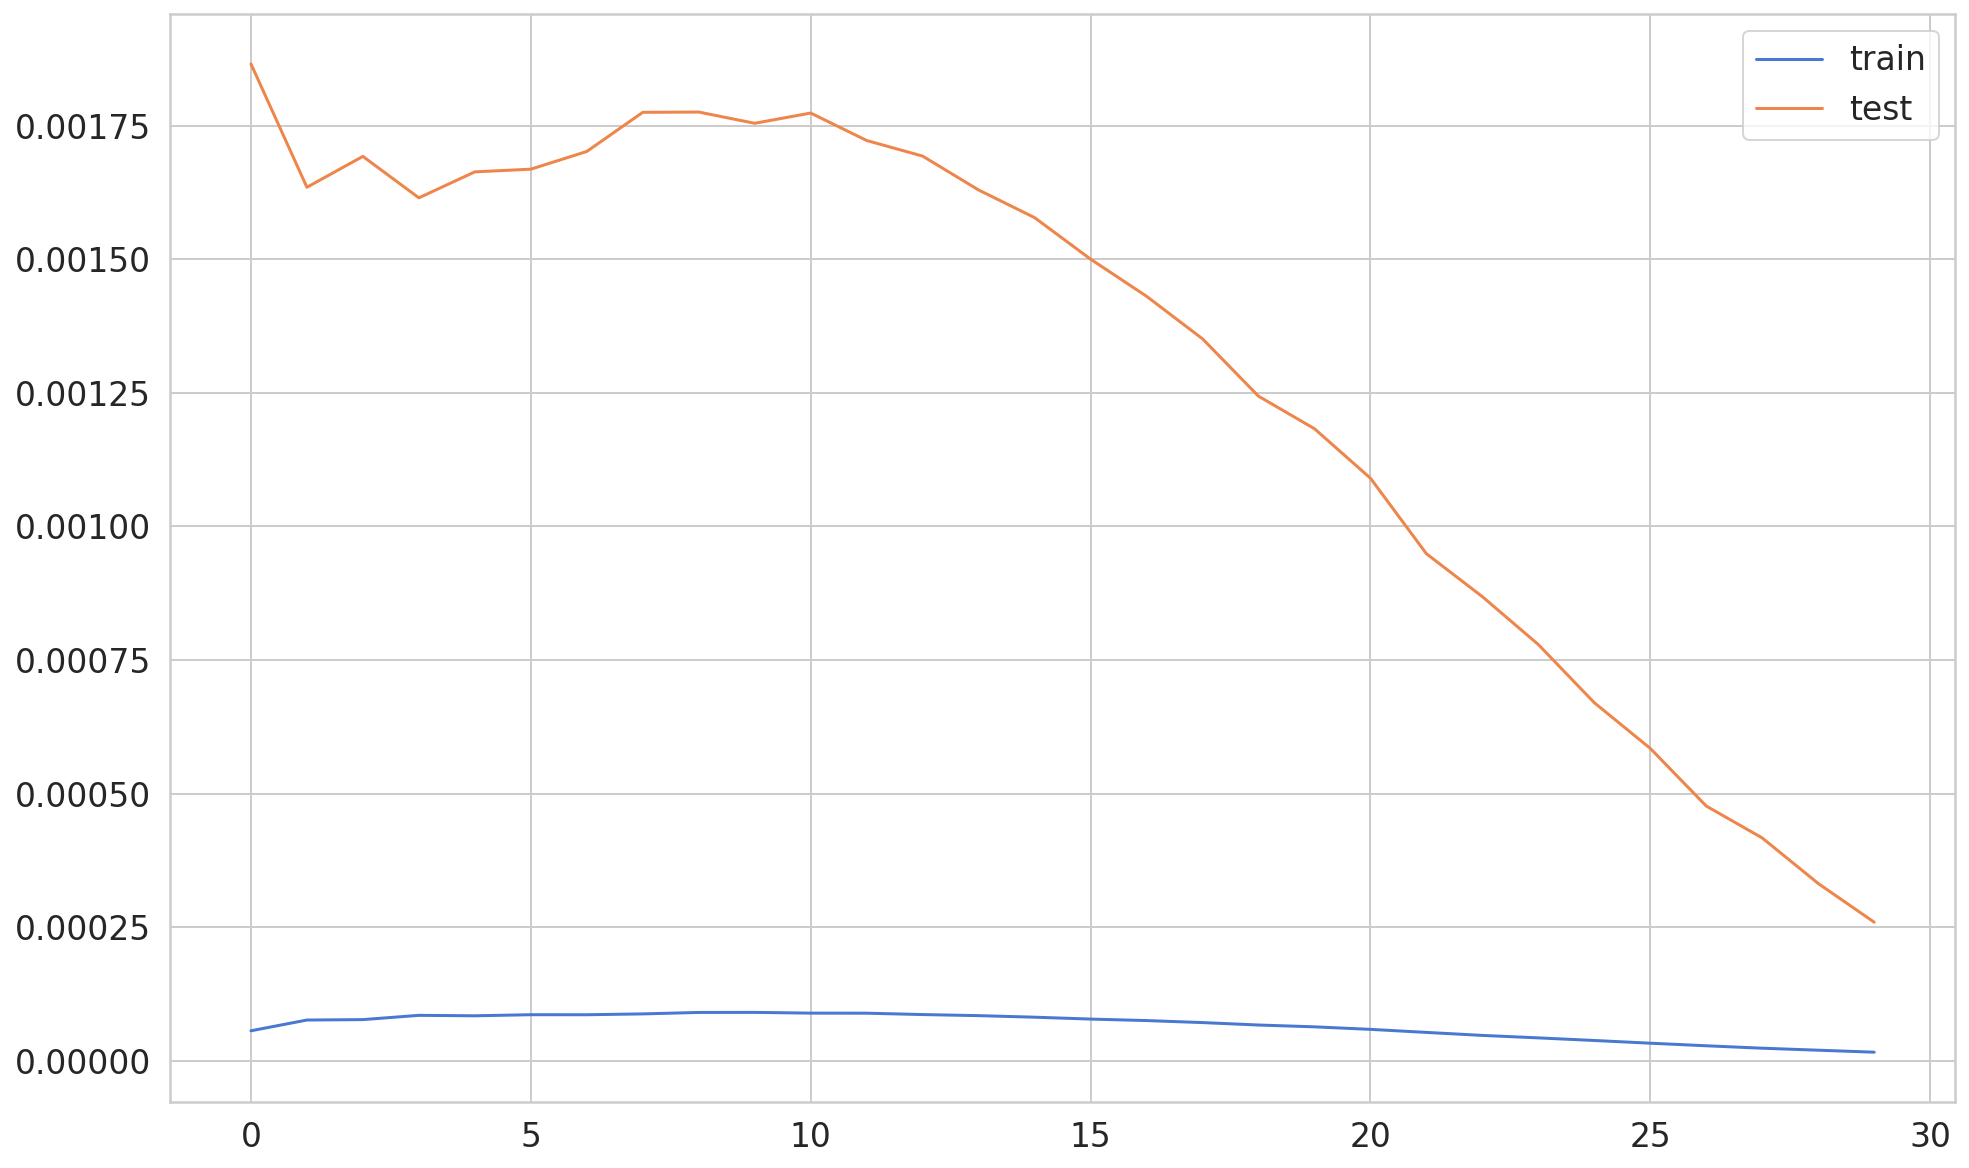

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)

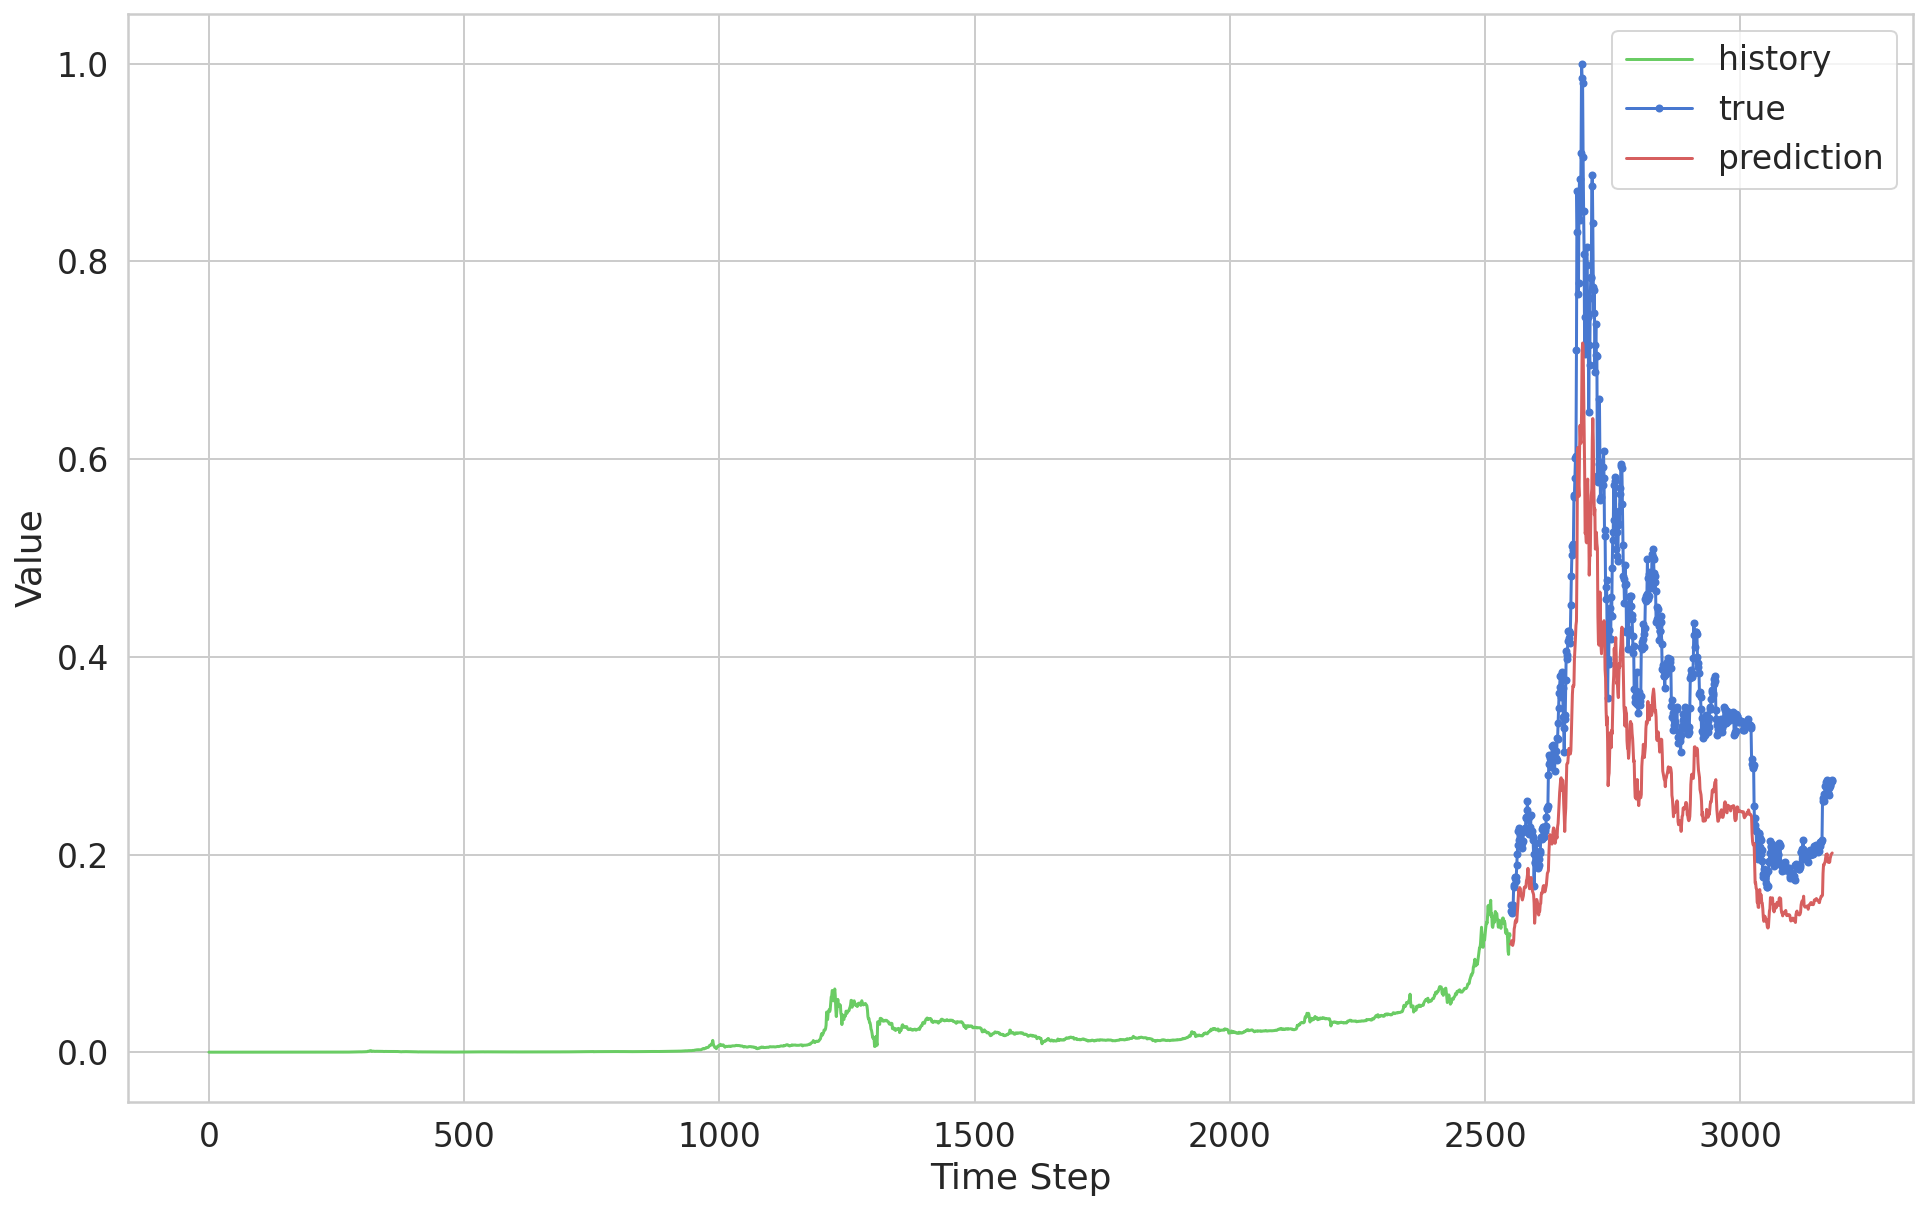

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

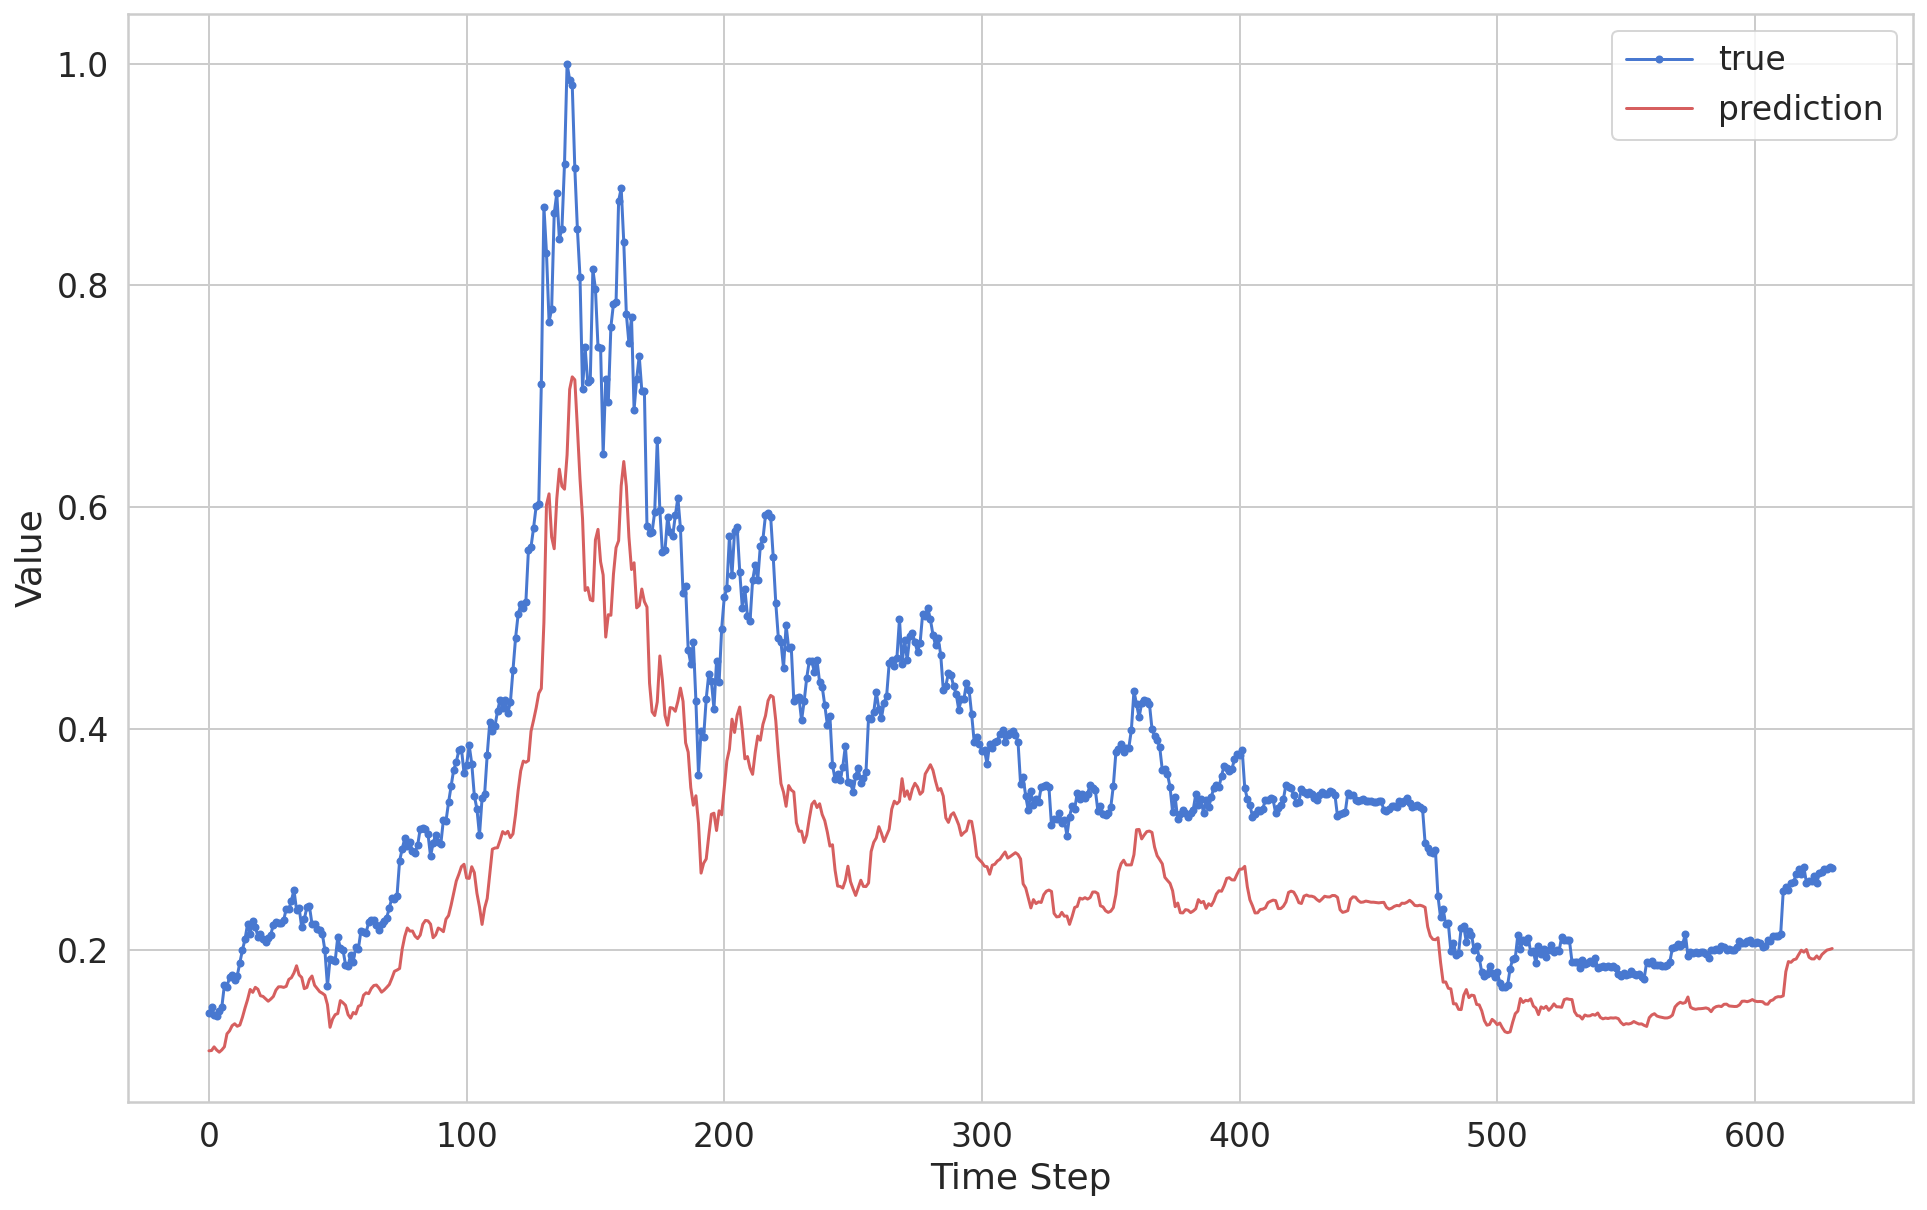

In [ ]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

More: https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru